## Description

1. age
2. sex
3. cp: chest pain type (4 values)
4. tresbp: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
7. restcg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0 & 1

This dataset includes various features related to heart disease and their respective target labels. The features include age, sex, chest pain type, resting blood pressure, serum cholestoral level, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, the number of major vessels colored by flourosopy, and the presence of fixed or reversible defects. The target label represents the presence (1) or absence (0) of heart disease. This dataset can be used for building predictive models to diagnose heart disease based on a patient's features.

### Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\neela\Downloads\Datasets\heartDisease - heartDisease.csv")

In [5]:
df_copy = df.copy()

### Basic Analysis

In [6]:
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df_columns = df_copy.columns
df_columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [8]:
df_copy.shape

(303, 14)

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df_copy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df_copy.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

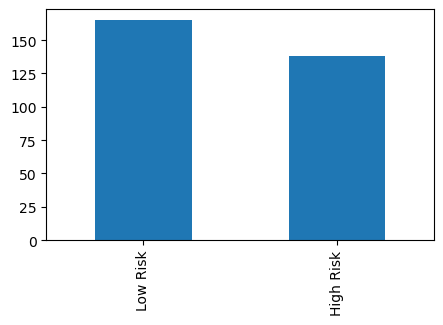

In [12]:
plt.figure(figsize=(5,3))
df_copy["target"].value_counts().plot(kind = "bar");
plt.xticks([0,1],['Low Risk','High Risk']);

In [13]:
print(pd.crosstab(index=df["sex"], columns=df["target"],normalize=True,margins=True))

target         0         1       All
sex                                 
0       0.079208  0.237624  0.316832
1       0.376238  0.306931  0.683168
All     0.455446  0.544554  1.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

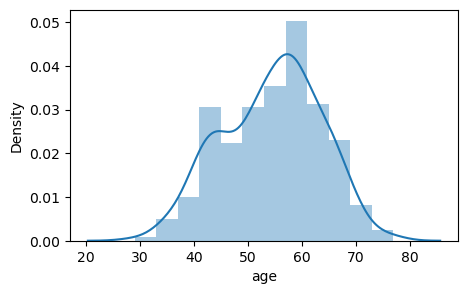

In [14]:
plt.figure(figsize=(5,3));
sns.distplot(df["age"])

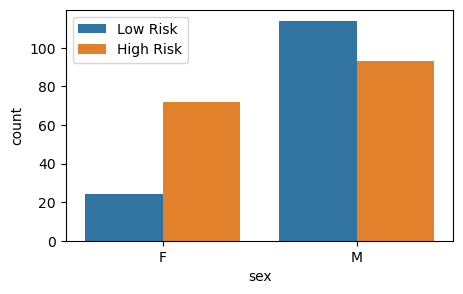

In [15]:
plt.figure(figsize=(5,3));
sns.countplot(data = df_copy, x = "sex", hue = "target")
plt.xticks([0,1],['F','M']);
plt.legend(labels = ["Low Risk","High Risk"]);

* More than 60 females in the dataset having risk of heart disease and around 80 males having risk of heart disease
* Anyhow the dataset consist of 68% of male and 31% of Female

In [16]:
print(pd.crosstab(index=df["cp"], columns=df["target"],normalize=True,margins=True))

target         0         1       All
cp                                  
0       0.343234  0.128713  0.471947
1       0.029703  0.135314  0.165017
2       0.059406  0.227723  0.287129
3       0.023102  0.052805  0.075908
All     0.455446  0.544554  1.000000


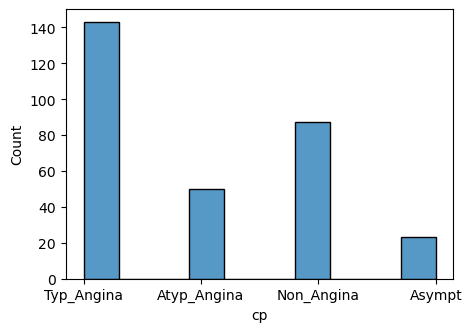

In [17]:
plt.figure(figsize=(5,3.5));
sns.histplot(df["cp"])
plt.xticks([0,1,2,3],["Typ_Angina","Atyp_Angina","Non_Angina", "Asympt"]);

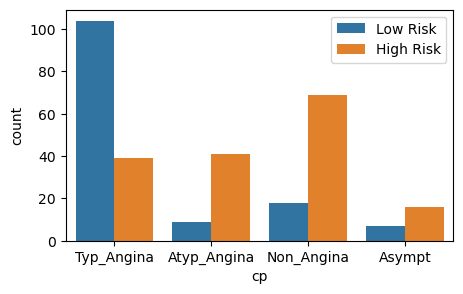

In [18]:
plt.figure(figsize=(5,3));
sns.countplot(data = df_copy, x = "cp", hue = "target")
plt.xticks([0,1,2,3],["Typ_Angina","Atyp_Angina","Non_Angina", "Asympt"]);
plt.legend(labels = ["Low Risk","High Risk"]);

* out of **47%** people who experience typical angina only **12%** people having high chances of heart disease.
* out of **16%** people who experience Atypical angina, around **13%** having high chances of heart disease.
* out of **28%** people who experience Non angina, in that **22%** people having high risk of heart disease.
* remaining **7%** peole who experience Asymtomatic pain, in that **5%** people having high risk of heart disease

In [19]:
print(pd.crosstab(index=df["fbs"], columns=df["target"],normalize=True,margins=True))

target         0         1       All
fbs                                 
0       0.382838  0.468647  0.851485
1       0.072607  0.075908  0.148515
All     0.455446  0.544554  1.000000


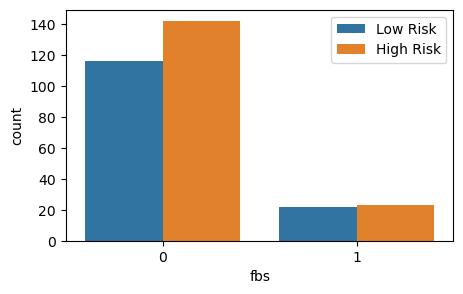

In [20]:
plt.figure(figsize=(5,3));
sns.countplot(data = df_copy, x = "fbs", hue = "target")
plt.legend(labels = ["Low Risk","High Risk"]);

* There are possibilty whose fbs<120mg/dl can have less chances of getting heart disease
* only **14%** people are diabetic

In [21]:
print(pd.crosstab(index=df["slope"], columns=df["target"],normalize=True,margins=True))

target         0         1       All
slope                               
0       0.039604  0.029703  0.069307
1       0.300330  0.161716  0.462046
2       0.115512  0.353135  0.468647
All     0.455446  0.544554  1.000000


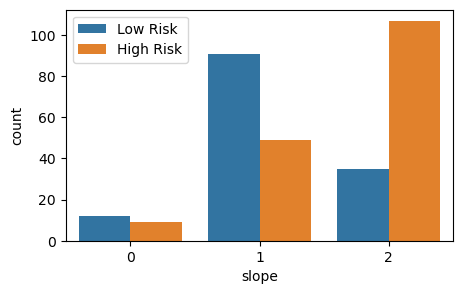

In [22]:
plt.figure(figsize=(5,3));
sns.countplot(data = df, x = "slope", hue = "target")
plt.legend(labels = ["Low Risk","High Risk"]);

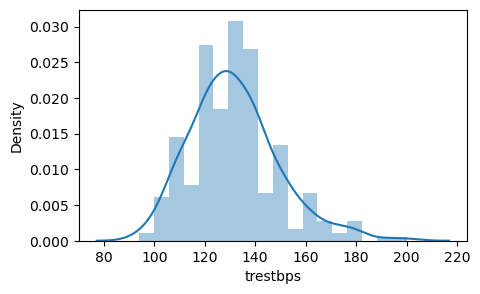

In [23]:
plt.figure(figsize=(5,3));
sns.distplot(df_copy["trestbps"]);

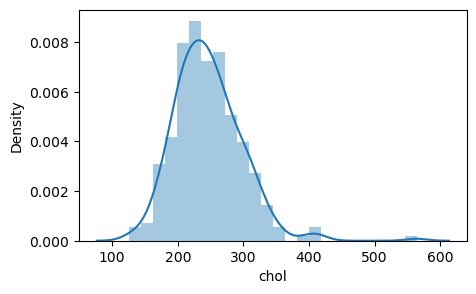

In [24]:
plt.figure(figsize=(5,3));
sns.distplot(df_copy["chol"]);

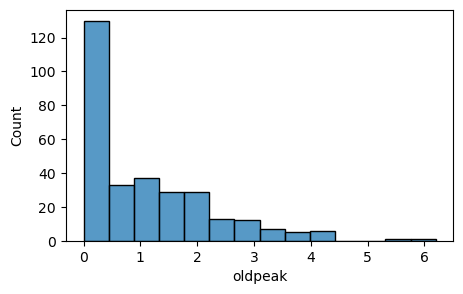

In [25]:
plt.figure(figsize=(5,3));
sns.histplot(df["oldpeak"]);

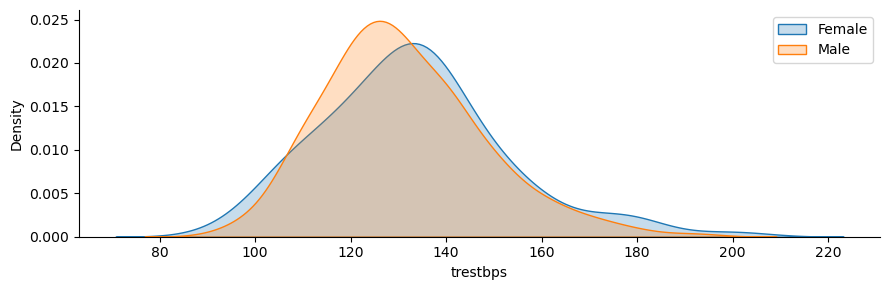

In [26]:
y = sns.FacetGrid(data=df,hue = "sex",aspect = 3)
y.map(sns.kdeplot,"trestbps",shade=True);
# plt.xticks([0,1],["Female","Male"] )
plt.legend(labels = ["Female","Male"] );

* For Women the resting blood pressure is overall lesser than men

### Correlation

In [27]:
corr = df.corr()

<AxesSubplot:>

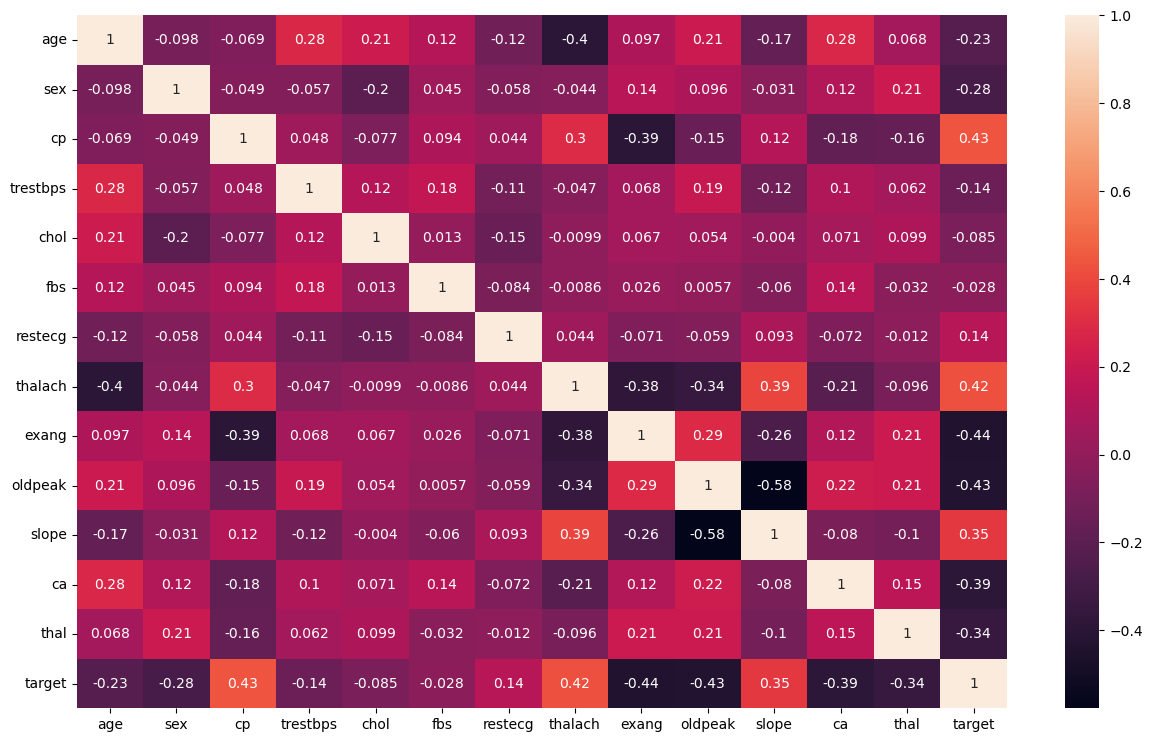

In [28]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot = True)

* cp, thalach and slope are positively correlated with target(directly proportional)
* exang, oldpeak and ca are inversely proportional to target

### Outlier Anaysis & Removal

In [29]:
Counti_Col = ["age", "trestbps", "chol", "thalach","oldpeak"]

In [30]:
Catego_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [31]:
Catego_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [32]:
for i in Catego_col:
    print(i,df_copy[i].unique())

sex [1 0]
cp [3 2 1 0]
fbs [1 0]
restecg [0 1 2]
exang [0 1]
slope [0 2 1]
ca [0 2 1 3 4]
thal [1 2 3 0]


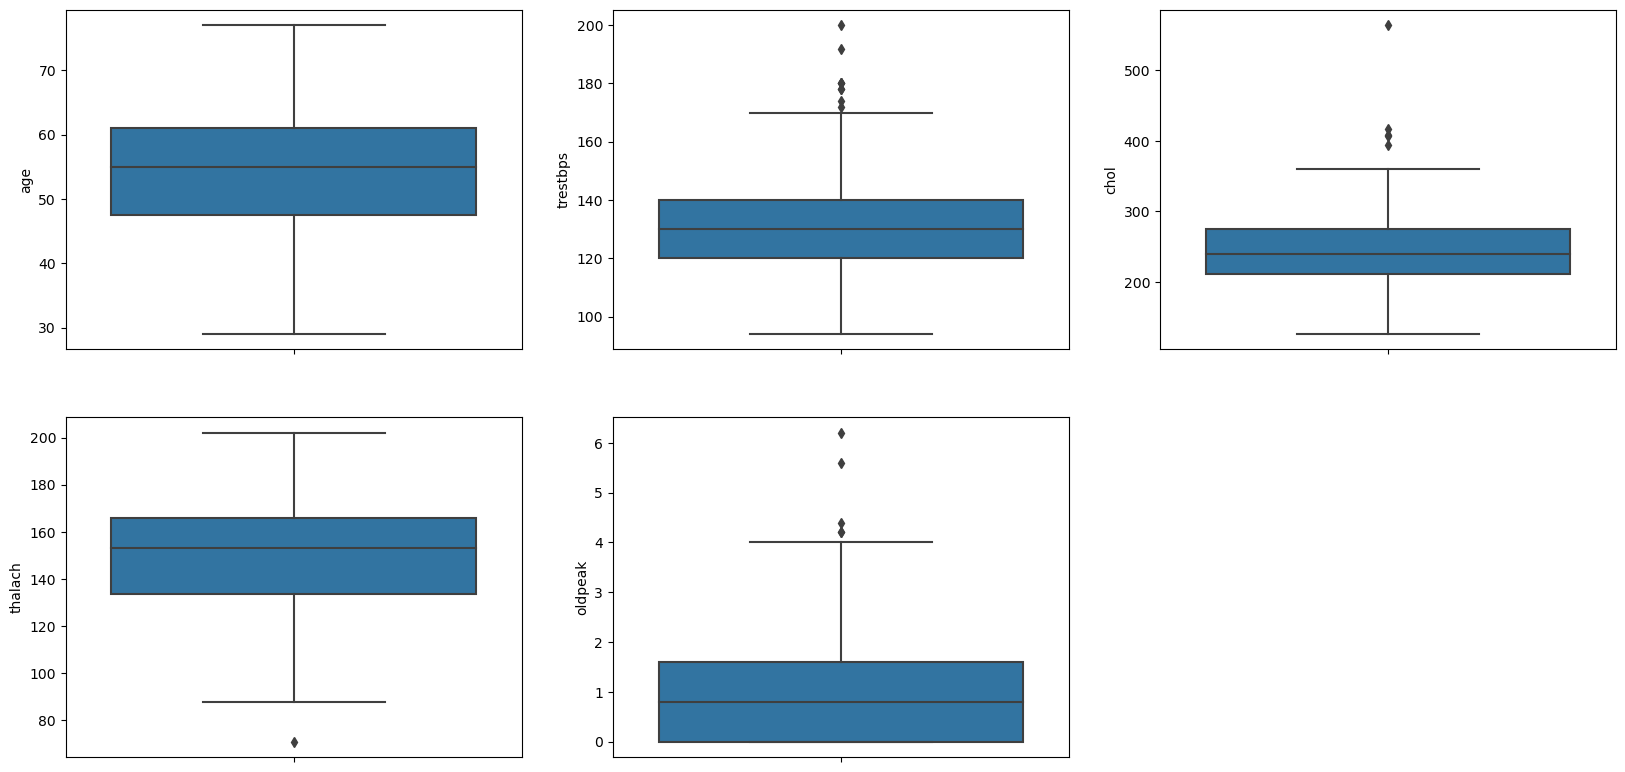

In [33]:
plt.figure(figsize=(20,15))
for j,i in enumerate(Counti_Col):
    plt.subplot(3,3,j+1)
    sns.boxplot(y = df_copy[i], data = df)

In [34]:
k = df_copy.trestbps.quantile([0.25,0.50,0.75])

In [35]:
k

0.25    120.0
0.50    130.0
0.75    140.0
Name: trestbps, dtype: float64

In [36]:
IQR = k[0.75] - k[0.25]
lower = k[0.25] - (1.5*IQR)
upper = k[0.75] + (1.5*IQR)

In [37]:
print("Total no of Outliers in trestbps", df[(df["trestbps"]<lower) | (df["trestbps"]>upper)].shape[0])
df_copy = df[(df["trestbps"]>lower) & (df["trestbps"]<upper)]

Total no of Outliers in trestbps 9


In [38]:
df_copy.shape[0]

290

### Encoding

**One-Hot Encoding**

In [39]:
df_copy = pd.get_dummies(df_copy, columns = Catego_col)

In [40]:
df_copy.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [41]:
X = df_copy.drop("target",axis=1)

In [42]:
X.shape

(290, 30)

In [43]:
Y = df_copy.target

### Feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
Scaling = StandardScaler()

In [45]:
# X = Scaling.fit_transform(X)

### Splitting of Data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

### Modelling

**1.Logistic Regression**

In [48]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 150)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=150)

In [49]:
LR_pred = LR.predict(x_test)

In [50]:
from sklearn.metrics import classification_report, accuracy_score

In [51]:
LR_acc = accuracy_score(y_test,LR_pred)

In [52]:
print("Accuracy score of Logistic regression: {:.2f}%".format(LR_acc*100),end="\n\n")
print(classification_report(y_test, LR_pred))

Accuracy score of Logistic regression: 87.67%

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.86      0.93      0.89        40

    accuracy                           0.88        73
   macro avg       0.88      0.87      0.87        73
weighted avg       0.88      0.88      0.88        73



**2.Decision Tree**

In [53]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion="gini",max_depth=150)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=150)

In [54]:
DTC_pred = DTC.predict(x_test)

In [55]:
DTC_acc = accuracy_score(y_test,DTC_pred)

In [56]:
print("Accuracy score of DecisionTreeClassifier: {:.2f}%".format(DTC_acc*100),end="\n\n")
print(classification_report(y_test, DTC_pred))

Accuracy score of DecisionTreeClassifier: 76.71%

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        33
           1       0.81      0.75      0.78        40

    accuracy                           0.77        73
   macro avg       0.77      0.77      0.77        73
weighted avg       0.77      0.77      0.77        73



**3.SupportVectorMachine**

In [57]:
from sklearn.svm import SVC
SVM = SVC(kernel = "linear",probability=True)
SVM.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [58]:
SVM_pred = SVM.predict(x_test)

In [59]:
SVM_acc = accuracy_score(y_test,SVM_pred)

In [60]:
print("Accuracy score of SupportVectorMachine: {:.2f}%".format(SVM_acc*100),end="\n\n")
print(classification_report(y_test, SVM_pred))

Accuracy score of SupportVectorMachine: 80.82%

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        33
           1       0.81      0.85      0.83        40

    accuracy                           0.81        73
   macro avg       0.81      0.80      0.81        73
weighted avg       0.81      0.81      0.81        73



**4.RandomForest**

In [61]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=150,random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [62]:
RFC_pred = RFC.predict(x_test)

In [63]:
RFC_acc = accuracy_score(y_test,RFC_pred)

In [64]:
print("Accuracy score of RandomForestClassifier: {:.2f}%".format(RFC_acc*100),end="\n\n")
print(classification_report(y_test, RFC_pred))

Accuracy score of RandomForestClassifier: 86.30%

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.89      0.85      0.87        40

    accuracy                           0.86        73
   macro avg       0.86      0.86      0.86        73
weighted avg       0.86      0.86      0.86        73



**5.Adaboost**

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=4,learning_rate=1.0)
ABC.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=4)

In [66]:
ABC_pred = ABC.predict(x_test)

In [67]:
ABC_acc = accuracy_score(y_test,ABC_pred)

In [68]:
print("Accuracy score of AdaboostClassifier: {:.2f}%".format(ABC_acc*100),end="\n\n")
print(classification_report(y_test, ABC_pred))

Accuracy score of AdaboostClassifier: 84.93%

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.84      0.90      0.87        40

    accuracy                           0.85        73
   macro avg       0.85      0.84      0.85        73
weighted avg       0.85      0.85      0.85        73



**6.Adaboost using Logistic as base estimator**

In [69]:
ABC_logistic = AdaBoostClassifier(n_estimators=4,base_estimator=LR,learning_rate=1.0)
ABC_logistic.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=150),
                   n_estimators=4)

In [70]:
ABC_logistic_pred = ABC_logistic.predict(x_test)

In [71]:
ABC_logistic_acc = accuracy_score(y_test,ABC_logistic_pred)

In [72]:
print("Accuracy score of AdaboostClassifier with logistic: {:.2f}%".format(ABC_logistic_acc*100),end="\n\n")
print(classification_report(y_test, ABC_logistic_pred))

Accuracy score of AdaboostClassifier with logistic: 84.93%

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.81      0.95      0.87        40

    accuracy                           0.85        73
   macro avg       0.87      0.84      0.84        73
weighted avg       0.86      0.85      0.85        73



**7.Adaboost using Svm as base estimator**

In [73]:
ABC_svm = AdaBoostClassifier(n_estimators=50,base_estimator=SVM,learning_rate=1.0)
ABC_svm.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True))

In [74]:
ABC_svm_pred = ABC_svm.predict(x_test)

In [75]:
ABC_svm_acc = accuracy_score(y_test,ABC_svm_pred)

In [76]:
print("Accuracy score of AdaboostClassifier with svm: {:.2f}%".format(ABC_svm_acc*100),end="\n\n")
print(classification_report(y_test, ABC_svm_pred))

Accuracy score of AdaboostClassifier with svm: 67.12%

              precision    recall  f1-score   support

           0       1.00      0.27      0.43        33
           1       0.62      1.00      0.77        40

    accuracy                           0.67        73
   macro avg       0.81      0.64      0.60        73
weighted avg       0.79      0.67      0.62        73



**So, Compared to other model Logistic and Ada boost gives a better result**